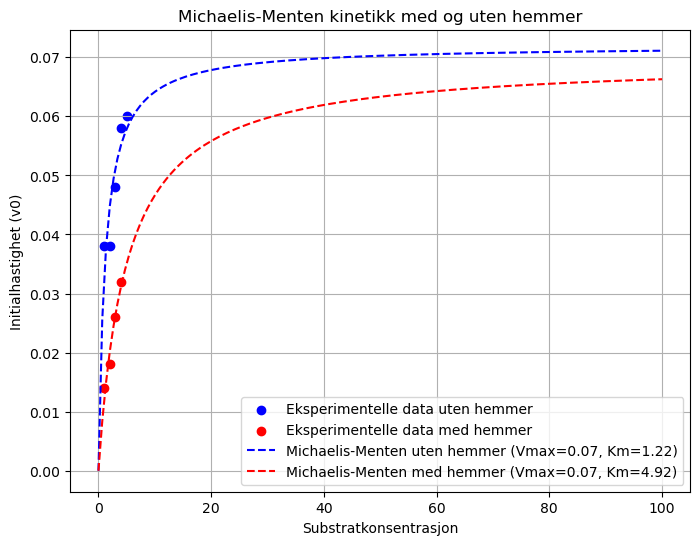

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definer Michaelis-Menten-modellen
def michaelis_menten(s, vmax, km):
    return (vmax * s) / (km + s)

# Liste over filnavn for data uten og med hemmer
absorbans_files = [f"absorbans{i}.csv" for i in range(5, 0, -1)]
absorbans_hemmer_files = [f"absorbans_hemmer{i}.csv" for i in range(4, 0, -1)]

# Funksjon for å lese og beregne initialhastighet
def extract_initial_rates(filenames):
    initial_rates = []
    for file in filenames:
        df = pd.read_csv(file, delimiter=";")
        tid = df["tid_min"].astype(float)
        abs_values = df["abs"].astype(float)
        
        # Beregn initialhastighet som første differanse
        v0 = (abs_values.iloc[1] - abs_values.iloc[0]) / (tid.iloc[1] - tid.iloc[0])
        initial_rates.append(v0)
    return np.array(initial_rates)

# Ekstrakt initialhastigheter
substrate_concentrations = np.arange(1, len(absorbans_files) + 1)  # Antatt substratkonsentrasjon
v0_no_inhibitor = extract_initial_rates(absorbans_files)
v0_with_inhibitor = extract_initial_rates(absorbans_hemmer_files)

# Juster startverdier for curve_fit
vmax_guess = max(max(v0_no_inhibitor), max(v0_with_inhibitor))  # Antatt Vmax som maks av initialhastigheter
km_guess = np.mean(substrate_concentrations)  # Antatt Km som gjennomsnittlig substratkonsentrasjon

# Sett grenser for parametrene
param_bounds = ([0, 0], [np.inf, np.inf])

# Tilpasning av Michaelis-Menten-modellen
params_no_inhibitor, _ = curve_fit(michaelis_menten, substrate_concentrations[:len(v0_no_inhibitor)], v0_no_inhibitor, p0=[vmax_guess, km_guess], bounds=param_bounds)
params_with_inhibitor, _ = curve_fit(michaelis_menten, substrate_concentrations[:len(v0_with_inhibitor)], v0_with_inhibitor, p0=[vmax_guess, km_guess], bounds=param_bounds)

# Generer data for plotting
s_fit = np.linspace(0, max(substrate_concentrations) *20, 150)
v_fit_no_inhibitor = michaelis_menten(s_fit, *params_no_inhibitor)
v_fit_with_inhibitor = michaelis_menten(s_fit, *params_with_inhibitor)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(substrate_concentrations[:len(v0_no_inhibitor)], v0_no_inhibitor, label="Eksperimentelle data uten hemmer", color='blue')
plt.scatter(substrate_concentrations[:len(v0_with_inhibitor)], v0_with_inhibitor, label="Eksperimentelle data med hemmer", color='red')
plt.plot(s_fit, v_fit_no_inhibitor, label=f"Michaelis-Menten uten hemmer (Vmax={params_no_inhibitor[0]:.2f}, Km={params_no_inhibitor[1]:.2f})", linestyle='dashed', color='blue')
plt.plot(s_fit, v_fit_with_inhibitor, label=f"Michaelis-Menten med hemmer (Vmax={params_with_inhibitor[0]:.2f}, Km={params_with_inhibitor[1]:.2f})", linestyle='dashed', color='red')

plt.xlabel("Substratkonsentrasjon")
plt.ylabel("Initialhastighet (v0)")
plt.title("Michaelis-Menten kinetikk med og uten hemmer")
plt.legend()
plt.grid()
plt.show()

km

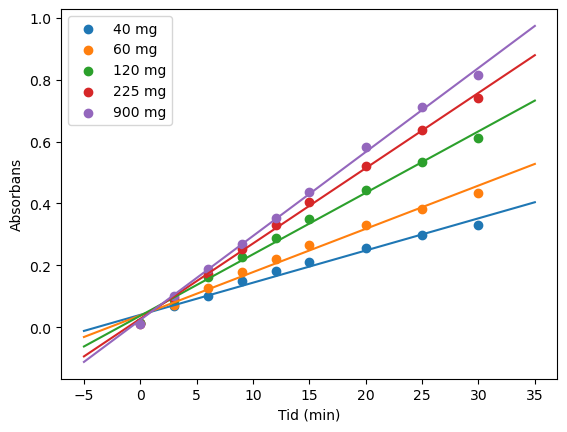

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

dataliste = ['S40.csv' ,'S60.csv' ,'S120.csv' ,'S225.csv' , 'S900.csv']
S = [40,60,120,225,900] # Substratkonsentrasjoner i mikrogram/L

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

t = np.linspace(-5,35,100) # Nye x-verdier å plotte med
V = [] # Initialhastigheter

for i in range(len(dataliste)):
    data = pd.read_csv(dataliste[i]) # Leser fila
    koeff, covar = opt.curve_fit(modell, data["tid"], data["absorbans"])
    V0 = koeff[0]
    I = koeff[1]
    y = V0*t + I               # Regresjonsmodellens y-verdier
    plt.scatter(data["tid"], data["absorbans"], label = str(S[i])+" mg")
    plt.plot(t, y)
    plt.xlabel("Tid (min)")
    plt.ylabel("Absorbans")
    V.append(V0) #legger til funnet initialhastighet til liste

# plt.savefig("initialhastigheter.png")
plt.legend()
plt.show()

# Lagrer dataene i en dataframe og skriver dem til en csv-fil
d = {"Hastighet": V, "Substratkonsentrasjon": S}
df = pd.DataFrame(d)
df.to_csv("Reaksjonshastigheter_test.csv", index = False)

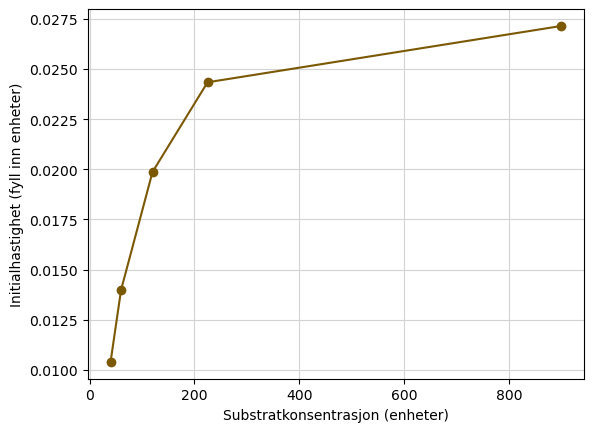

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter_test.csv')
V = data2["Hastighet"]
S = data2["Substratkonsentrasjon"]

plt.plot(S, V, marker = "o", color = "xkcd:shit brown")
plt.ylabel('Initialhastighet (fyll inn enheter)')
plt.xlabel("Substratkonsentrasjon (enheter)")
plt.grid(color='lightgrey')
plt.show()

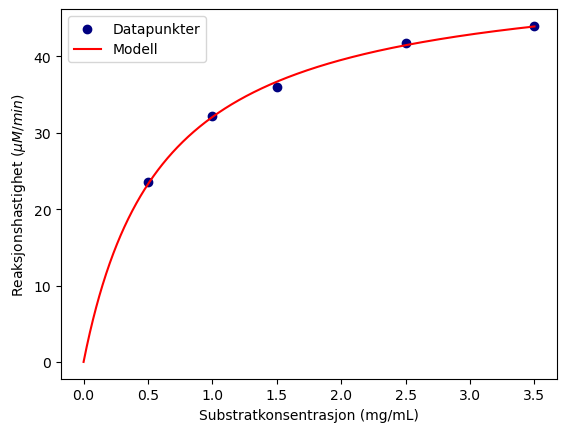

In [4]:
import scipy.optimize as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter.csv')
V = data2["V"]
S = data2["S"]

def michaelis_menten(x, Vmax, Km):
    return Vmax*x/(Km + x)

parametre, kovarians = opt.curve_fit(michaelis_menten, S, V)
Vmax = parametre[0]
Km = parametre[1]

x_ny = np.linspace(0, max(S), 1000)
y_model = michaelis_menten(x_ny, Vmax, Km)

plt.scatter(S, V, marker = "o", color = "navy", label="Datapunkter")
plt.plot( x_ny, y_model, "r-", label="Modell")
plt.ylabel('Reaksjonshastighet ($\mu M/min$)')
plt.xlabel("Substratkonsentrasjon (mg/mL)")
plt.legend()
plt.savefig("reaksjonsrate.tiff", dpi=500)

stigningstall= 0.011531627249160294 
 V_maks= 51.09989832956896 
 MM-konstant = 0.589264980006578


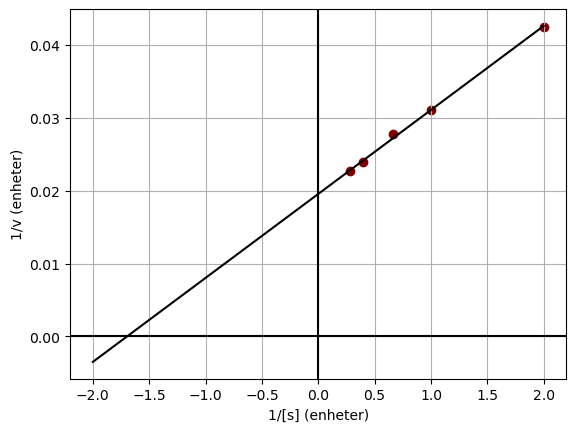

In [5]:
S_invers = 1/S
V_invers = 1/V

def modell(x, a, b):
    return a*x + b

koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
Km_vmaks = koeffisienter[0]
vmaks_invers = koeffisienter[1]

vmaks_LB = 1/vmaks_invers
km_LB = Km_vmaks*vmaks_LB

print('stigningstall=', Km_vmaks, '\n','V_maks=', vmaks_LB, '\n','MM-konstant =', km_LB)

x_ny = np.linspace(-max(S_invers), max(S_invers), 1000)
y_modell = Km_vmaks*x_ny + vmaks_invers

plt.scatter(S_invers, V_invers, color = "maroon")
plt.plot(x_ny, y_modell, color = "black")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0,color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()

In [6]:
km_LB

0.589264980006578

In [7]:
Km

0.607068096755897

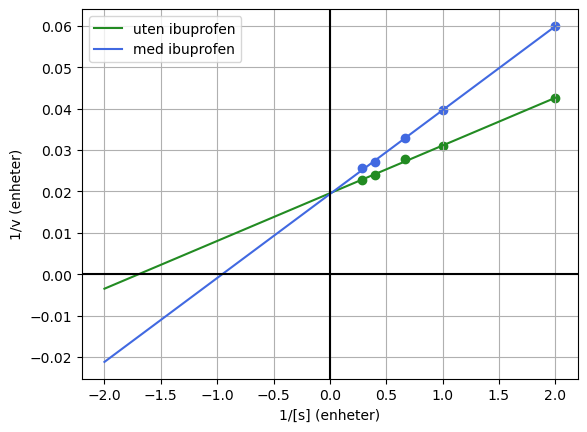

In [8]:
import pandas as pd

def Lineweaver_Burk(filnavn, farge, navn):
    """
    Funksjon som lager et Lineweaver-Burk-plott fra en datafil med
    reaksjonsfart i første kolonne og substratkonsentrasjon i andre kolonne.
    
    Parametre
    ---------
    filnavn: .txt- eller .csv-fil som inneholder reaksjonsfarten V og substratkonsentrasjonen S
    farge: ønsket farge på datapunktene og den tilpassede kurven.
    navn: merkelapper (labels) for kurven.
    
    Returnerer
    ----------
    vmaks: Maks reaksjonsfart
    km: Michaelis-Menten-konstanten
    """
    data = pd.read_csv(filnavn)
    V = data.iloc[:, 0] # Velger alle radverdier i første kolonne
    S = data.iloc[:, 1] # Velger alle radverdier i andre kolonne
    V_invers = 1/V
    S_invers = 1/S
    
    def modell(x, a, b):
        return a*x + b
    
    koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
    Km_vmaks = koeffisienter[0]
    vmaks_invers = koeffisienter[1]
    
    vmaks = 1/vmaks_invers
    km = Km_vmaks*vmaks
    
    x_ny = np.linspace(-max(S_invers), max(S_invers), 100)
    y_modell = Km_vmaks*x_ny + vmaks_invers

    plt.scatter(S_invers, V_invers, color = farge)
    plt.plot(x_ny, y_modell, color = farge, label = navn)
    return vmaks, km

vmaks_original, km_original = Lineweaver_Burk("Reaksjonshastigheter.csv", "forestgreen", "uten ibuprofen")
vmaks_ibux, km_ibux = Lineweaver_Burk("Reaksjonshastigheter_ibuprofen.csv", "royalblue", "med ibuprofen")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.legend()
plt.show()

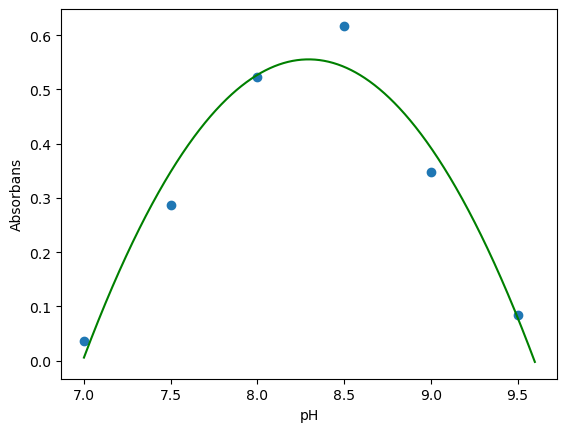

In [9]:
A = [0.036, 0.287, 0.5225, 0.617, 0.347, 0.085]
pH = [7, 7.5, 8, 8.5, 9, 9.5]

a,b,c=np.polyfit(pH, A, 2)
x = np.linspace(7,9.6,1000)
y = a*x**2 + b*x + c


plt.scatter(pH,A)
plt.plot(x,y, color="green")
plt.xlabel("pH")
plt.ylabel("Absorbans")
plt.savefig("abs_ph.tiff", dpi=500)